In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


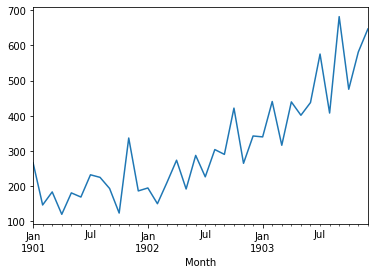

In [4]:
print(series.head())
series.plot()
pyplot.show()

##### OBSERVATION: TREND OBSERVED. SO NO STATIONALITY. THUS WE USE DIFFERENCING TO REDUCE SEASONALITY OR TREND

In [5]:
### THE AUTOCORELATION PLOT SHOWS THE LAGS AND DETERMINES THE AMOUNT OF TREND BY GOING TO ZERO QUICKLY OR LATE

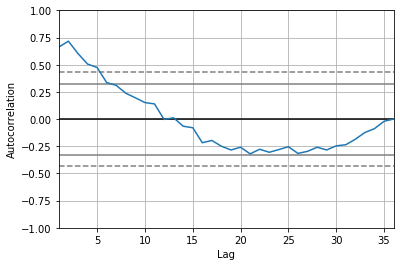

In [6]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(series)
pyplot.show()

##### OBSERVATION: GOES TO ZERO IN THE FIRST 10-12 LAGS, SO IT HAS POSITIVE CORRELATION IN THE FIRST 10-12 LAGS. APPROXIMATED THE LAG TO 5, SINCE IT MUST BE MOST SIGNIFICANT AROUND THAT LAG.

In [7]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in /Users/avik/anaconda3/lib/python3.7/site-packages (0.10.2)
Note: you may need to restart the kernel to use updated packages.


/Users/avik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/avik/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 19 Dec 2019   AIC                            406.340
Time:                        00:31:21   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

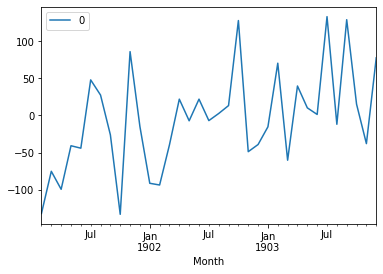

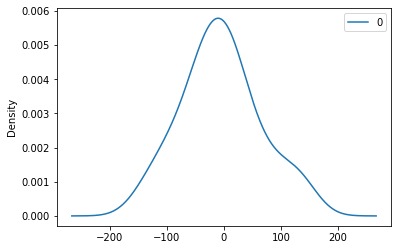

                0
count   35.000000
mean    -5.495244
std     68.132880
min   -133.296645
25%    -42.477877
50%     -7.186614
75%     24.748305
max    133.237969


In [8]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [9]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/avik/anaconda3/lib/python3.7/site-packages (0.22)
Note: you may need to restart the kernel to use updated packages.


[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]
36
23
[266.0, 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287.0, 226.0, 303.6, 289.9, 421.6, 264.5]
predicted=349.117682, expected=342.300000
predicted=306.512981, expected=339.700000
predicted=387.376459, expected=440.400000
predicted=348.154294, expected=315.900000
predicted=386.308835, expected=439.300000
predicted=356.082089, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737305, expected=575.500000
predicted=434.915529, expected=407.600000
predicted=507.923382, expected=682.000000
predicted=435.482892, expected=475.300000
predicted=652.743832, expected=581.300000
predicted=546.343524, expected=646.900000
Test MSE: 6958.326


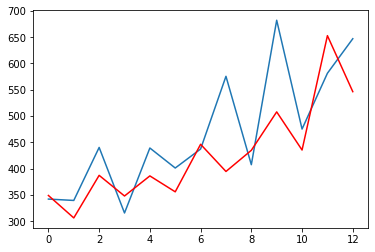

In [10]:
from sklearn.metrics import mean_squared_error
 
X = series.values
print(X)
print(len(X))
size = int(len(X) * 0.66)
print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 6531.240


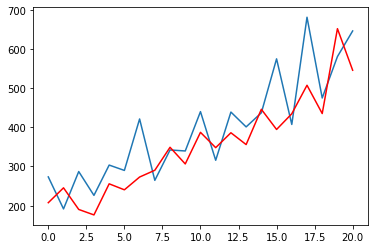

In [11]:
from sklearn.metrics import mean_squared_error
 
X = series.values
# print(X)
# print(len(X))
size = int(len(X) * 0.42)
# size = int(len(X) * 0.66)
# print(int(len(X)*0.66))
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# print(history)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<Figure size 720x432 with 0 Axes>

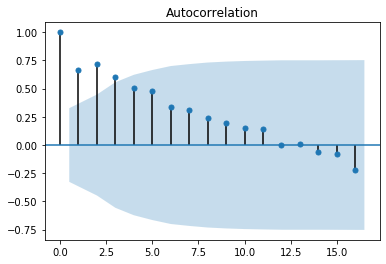

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
series = read_csv('shampoo.csv', header=0, index_col=0)
pyplot.figure(figsize=(10,6))
plot_acf(series)
pyplot.show()

<Figure size 720x432 with 0 Axes>

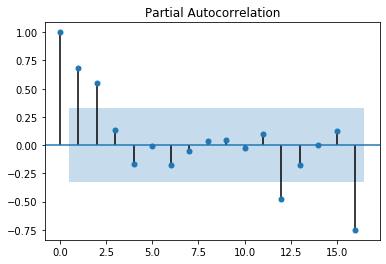

In [17]:
pyplot.figure(figsize=(10,6))
plot_pacf(series)
pyplot.show()

In [14]:
train, test = X[0:size], X[size:len(X)]

In [15]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.predict(1,4,'levels')
print(output)

[  2.29286812  81.16067912  -0.85957946 105.52128834]
